Study and then execute the following code which runs a classification ensemble model on the Iris dataset and generates various metrics

In [38]:
#LIBRARIES
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

from sklearn.model_selection import cross_val_predict

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, balanced_accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [33]:
#confusion matrix
def calculate_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    accuracy = accuracy_score(y_true, y_pred)
    balanced_acc = balanced_accuracy_score(y_true, y_pred)

    return sensitivity, specificity, accuracy, balanced_acc

In [34]:
# Load the Iris dataset

iris = load_iris()
X, y = iris.data, iris.target


In [35]:
#examine data
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


In [17]:
# Make it a binary classification problem: Virginica vs Others

y = (y == 2).astype(int)



# Add some noise to make the problem more challenging

np.random.seed(21)

X += np.random.normal(0, 0.5, X.shape)



# Use Random Forest with fewer trees to reduce overfitting

rf = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=21)

In [18]:
# Use cross-validation to get predictions

y_pred_proba = cross_val_predict(rf, X, y, cv=5, method='predict_proba')[:, 1]



# Calculate metrics with default threshold (0.5)

y_pred_default = (y_pred_proba >= 0.5).astype(int)

sensitivity_default, specificity_default, accuracy_default, balanced_acc_default = calculate_metrics(y, y_pred_default)

In [19]:
# Calculate ROC curve and AUC

fpr, tpr, thresholds = roc_curve(y, y_pred_proba)

auc = roc_auc_score(y, y_pred_proba)

In [26]:
# Print the distribution of target classes (species)
class_distribution = data['target'].value_counts()
print(class_distribution)

target
0    50
1    50
2    50
Name: count, dtype: int64


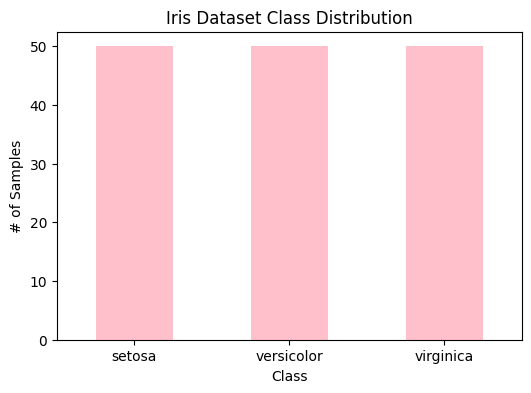

In [28]:
# Plot class distribution
plt.figure(figsize=(6, 4))
class_distribution.plot(kind='bar', color='pink')
plt.title('Iris Dataset Class Distribution')
plt.xlabel('Class')
plt.ylabel('# of Samples')
plt.xticks(ticks=[0, 1, 2], labels=iris.target_names, rotation=0)
plt.show()

In [20]:
# Find optimal threshold (maximizing balanced accuracy)

balanced_accuracy = (tpr + (1 - fpr)) / 2

optimal_idx = np.argmax(balanced_accuracy)

optimal_threshold = thresholds[optimal_idx]

# Apply optimal threshold to get final predictions

y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

In [21]:
# Calculate metrics with optimal threshold

sensitivity_optimal, specificity_optimal, accuracy_optimal, balanced_acc_optimal = calculate_metrics(y, y_pred_optimal)


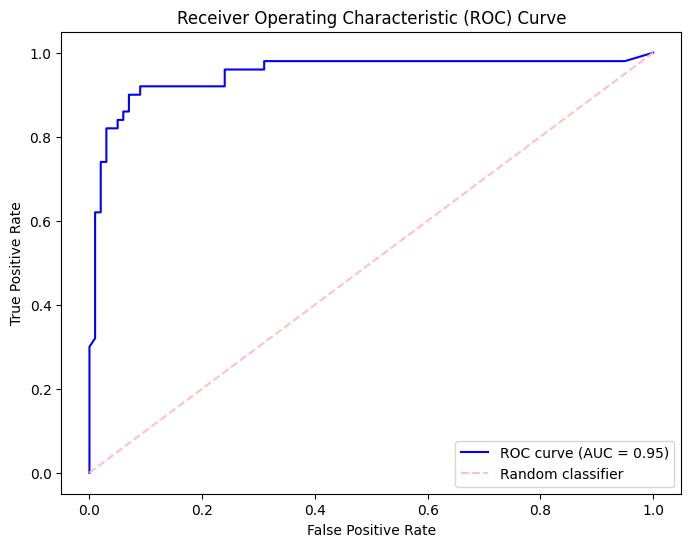

In [23]:
# Plot ROC curve

plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], color='pink', linestyle='--', label='Random classifier')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.legend()

plt.show()

In [24]:
print("Metrics with default threshold (0.5):")

print(f"Sensitivity: {sensitivity_default:.2f}")

print(f"Specificity: {specificity_default:.2f}")

print(f"Accuracy: {accuracy_default:.2f}")

print(f"Balanced Accuracy: {balanced_acc_default:.2f}")

Metrics with default threshold (0.5):
Sensitivity: 0.86
Specificity: 0.94
Accuracy: 0.91
Balanced Accuracy: 0.90


In [25]:
print("\nMetrics with optimal threshold:")

print(f"Optimal threshold: {optimal_threshold:.2f}")

print(f"Sensitivity: {sensitivity_optimal:.2f}")

print(f"Specificity: {specificity_optimal:.2f}")

print(f"Accuracy: {accuracy_optimal:.2f}")

print(f"Balanced Accuracy: {balanced_acc_optimal:.2f}")


Metrics with optimal threshold:
Optimal threshold: 0.47
Sensitivity: 0.90
Specificity: 0.93
Accuracy: 0.92
Balanced Accuracy: 0.92


In [42]:
#Precision, Recall, and F1-Score for default threshold (0.5)
precision_default = precision_score(y, y_pred_default, average='micro')
recall_default = recall_score(y, y_pred_default, average='micro')
f1_default = f1_score(y, y_pred_default, average='micro')

#Precision, Recall, and F1-Score for optimal threshold (0.47)
precision_optimal = precision_score(y, y_pred_optimal, average='micro')
recall_optimal = recall_score(y, y_pred_optimal, average='micro')
f1_optimal = f1_score(y, y_pred_optimal, average='micro')

print("Metrics with default threshold (0.5):")
print(f"Precision: {precision_default:.2f}")
print(f"Recall: {recall_default:.2f}")
print(f"F1-Score: {f1_default:.2f}")

print("\nMetrics with optimal threshold:")
print(f"Precision: {precision_optimal:.2f}")
print(f"Recall: {recall_optimal:.2f}")
print(f"F1-Score: {f1_optimal:.2f}")

Metrics with default threshold (0.5):
Precision: 0.37
Recall: 0.37
F1-Score: 0.37

Metrics with optimal threshold:
Precision: 0.38
Recall: 0.38
F1-Score: 0.38


Advantages of this approach:

Preserves the original data distribution during training
Allows fine-tuning of the model's behavior without retraining.
Can be more interpretable in some contexts (e.g., in medical diagnosis where we might want to explicitly set sensitivity/specificity targets).

Disadvantages:

May not work well if the model struggles to learn from the minority class in the first place.
Can be sensitive to changes in the test set's class distribution.
Might not fully utilize the potential of the model to learn complex decision boundaries.
This threshold adjustment approach complements the ensemble methods used in the original code, offering another layer of flexibility in handling class imbalance and optimizing model performance.

###END###